Hola de nuevo. Hemos superado el arduo proceso de limpieza y organización de datos, y como recompensa, hemos llegado a una de las partes más amigables y gratificantes: la visualización gráfica. La graficación desempeña un papel crucial en el análisis de datos, ya que nos permite comprender los insumos que utilizamos para generar información y por qué son clave en la toma de decisiones de muchas organizaciones. En este campo, la simplicidad y la belleza cobran aún más importancia, ya que los comandos de graficación son ampliamente sencillos y amigables. Esta sección nos brindará un pequeño vistazo a las herramientas gráficas y cómo se utilizan para realizar análisis simples pero poderosos. 

In [1]:
# !pip install pywaffle

import pandas as pd
from pywaffle import Waffle
import matplotlib.pyplot as plt

In [2]:
#Descargamos los datos de Brasil, para ejemplificar el proceso de graficacion el cual nos servira mas adelante
DatosBrasil = pd.read_csv("https://raw.githubusercontent.com/CesaRepositorio/LibroPython/main/DatosPaises/Brasil/listings.csv")

#Tambien descargamos los datos que procesamos en el capitulo anterior 
EmisionesCo2PorPersonaEnToneladas = pd.read_excel("https://github.com/CesaRepositorio/LibroPython/raw/main/DatosPaises/ResultadosWorldBank.xlsx",sheet_name="Co2PorPersonaToneladas",index_col="pais")
CantidadDeTuristas = pd.read_excel("https://github.com/CesaRepositorio/LibroPython/raw/main/DatosPaises/ResultadosWorldBank.xlsx",sheet_name="Turistas",index_col="pais")
IngresosPorTurista = pd.read_excel("https://github.com/CesaRepositorio/LibroPython/raw/main/DatosPaises/ResultadosWorldBank.xlsx",sheet_name="IngresosPorTurista",index_col="pais")
PorcentajeInflacion = pd.read_excel("https://github.com/CesaRepositorio/LibroPython/raw/main/DatosPaises/ResultadosWorldBank.xlsx",sheet_name="PorcentajeInflacion",index_col="pais")

En esta sección, es importante dejar volar nuestra imaginación y utilizar todas las opciones gráficas disponibles. Podemos aprovechar al máximo todas las herramientas y elementos para comprender nuestros datos. Aquí realizaremos algunas gráficas con análisis, pero recuerda que, como práctica, puedes explorar todas las opciones que desees. Cuantas más gráficas realices, mejor será nuestra comprensión de los datos. No hay límites en cuanto a la cantidad de gráficas que podemos generar

<AxesSubplot:xlabel='neighbourhood'>

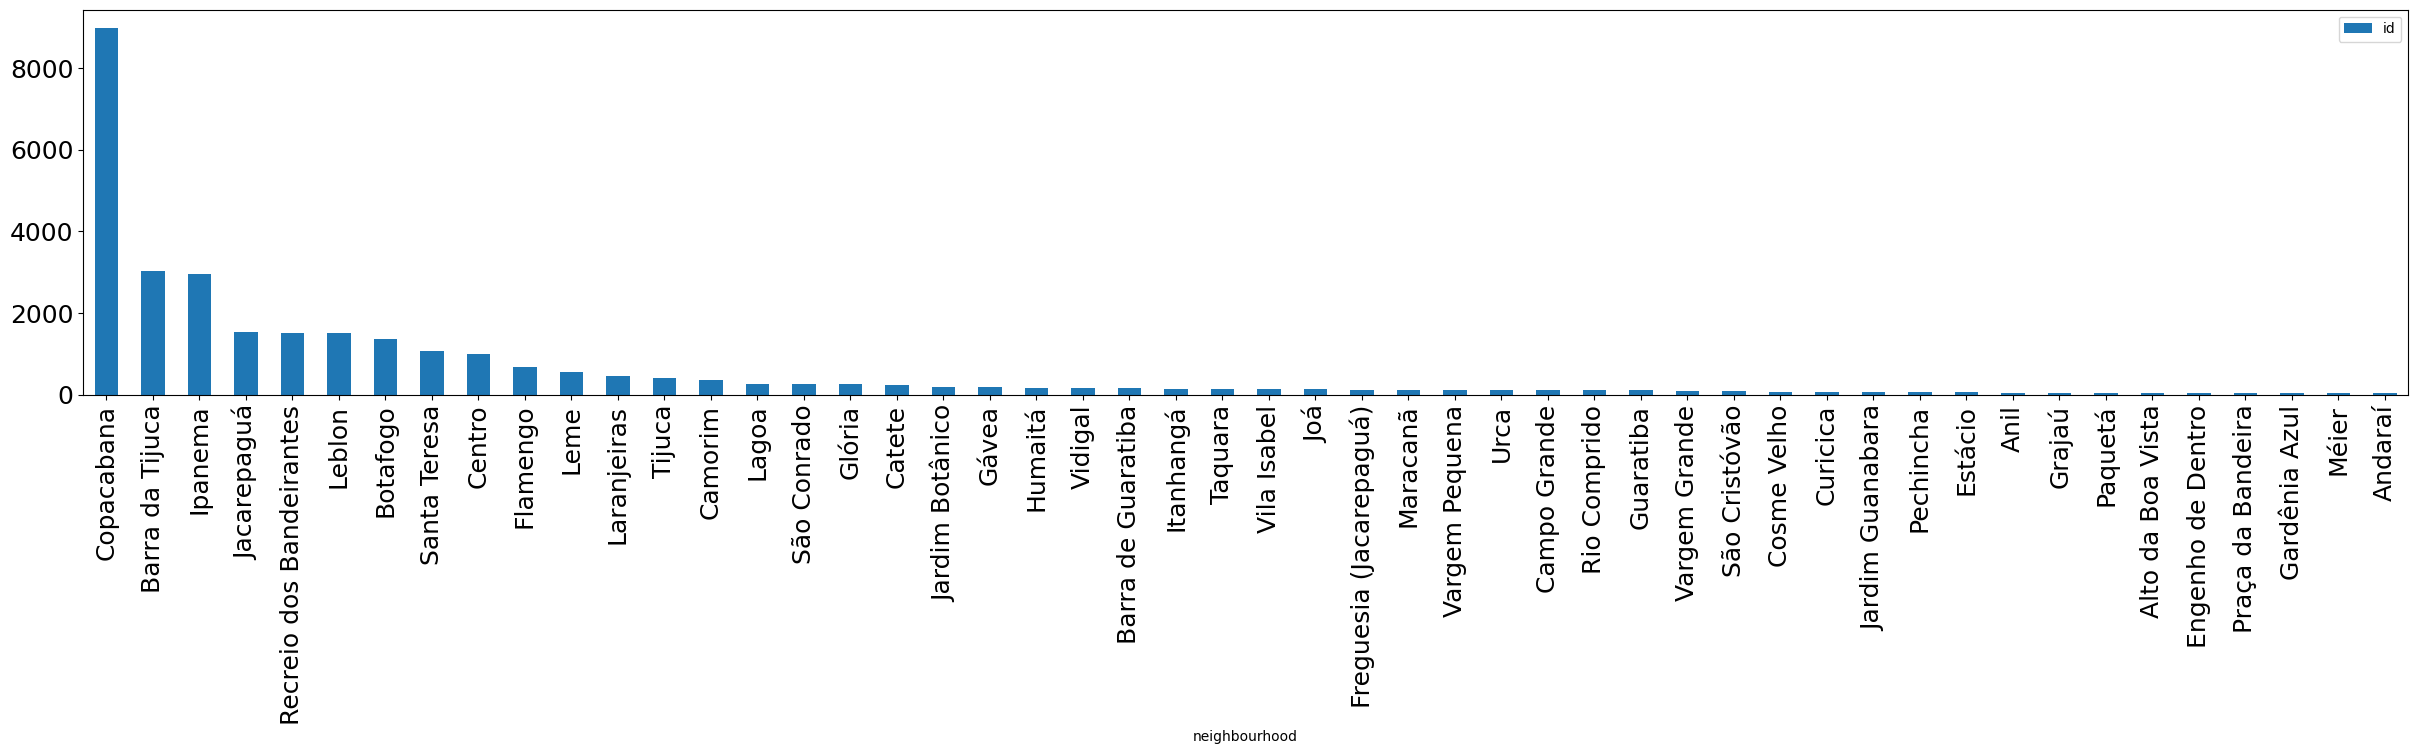

In [3]:
#aqui podemos ver los barrios mas frecuentados en rio de janeiro
#siendo copacabana por diferencia uno de los destinos mas frecuentados
#en orden de prioridad se nos indica la cantidad de sectores de mayor representacion turistica
DatosBrasil.groupby("neighbourhood").count().sort_values(by="id",ascending=False)[:50].plot(kind="bar",y=["id"],figsize=(30,5),fontsize=18)

In [4]:
Cambios = {'Entire home/apt':"Apartamento",
'Private room':"Cuarto Privado",
'Shared room':"Cuarto Compartido",
"Hotel room":"Cuarto de hotel"}

DatosBrasil["room_type"] = DatosBrasil["room_type"].apply(lambda x: Cambios[x])

In [5]:
valores=DatosBrasil.groupby("room_type").count().sort_values(by="id",ascending=False)["id"].values
DatosBrasil.groupby("room_type").count().sort_values(by="id",ascending=False)[["id"]]

,id
room_type,
Apartamento,23753
Cuarto Privado,6167
Cuarto Compartido,504
Cuarto de hotel,52


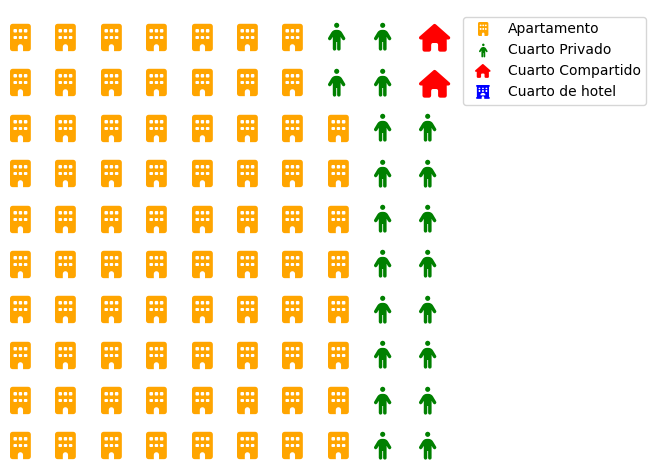

In [6]:
# esta infografia hace referencia a la cantidad de veces que se ve cada uno de los cuartos, 
#por cada 100 personas se estima que 77 se hospeden en apartamentos
#por cada 100 personas se estima que 20 se hospeden en cuartos privados
#por cada 100 personas se estima que 2 se hospeden en cuartos compartidos
#por cada 100 personas se estima que 1 se hospeden en cuartos de hotel

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=valores/sum(valores)*100,
    colors=["orange", "green", "red","blue"],
    icons=['building', 'person', 'house','hotel'],
    font_size=20,
    icon_style='solid',
    icon_legend=True,
    legend={
        'labels': ['Apartamento', 'Cuarto Privado', 'Cuarto Compartido',"Cuarto de hotel"], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    }
)

C:\Users\Anderson\AppData\Local\Temp\ipykernel_4168\2251702442.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


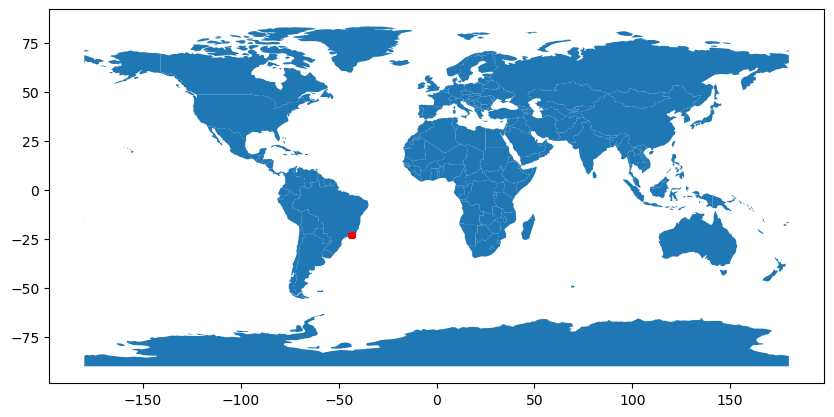

In [7]:
# !pip install geopandas

import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(DatosBrasil['longitude'], DatosBrasil['latitude'])]
gdf = GeoDataFrame(DatosBrasil, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

C:\Users\Anderson\AppData\Local\Temp\ipykernel_4168\1846213613.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\Anderson\AppData\Local\Temp\ipykernel_4168\1846213613.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


<AxesSubplot:>

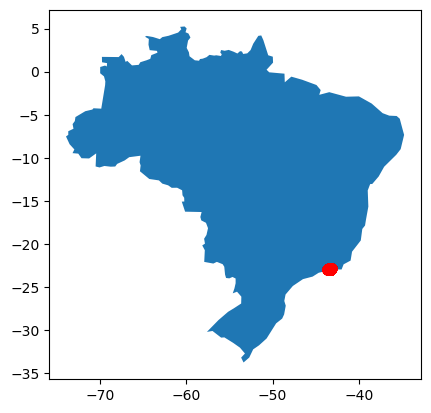

In [8]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brasil = world[world.name == 'Brazil']
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = brasil.plot()
gdf.plot(ax=ax, color='r')

("https://github.com/CesaRepositorio/LibroPython/blob/main/DatosPaises/Brasil/neighbourhoods.geojson")

<AxesSubplot:xlabel='pais'>

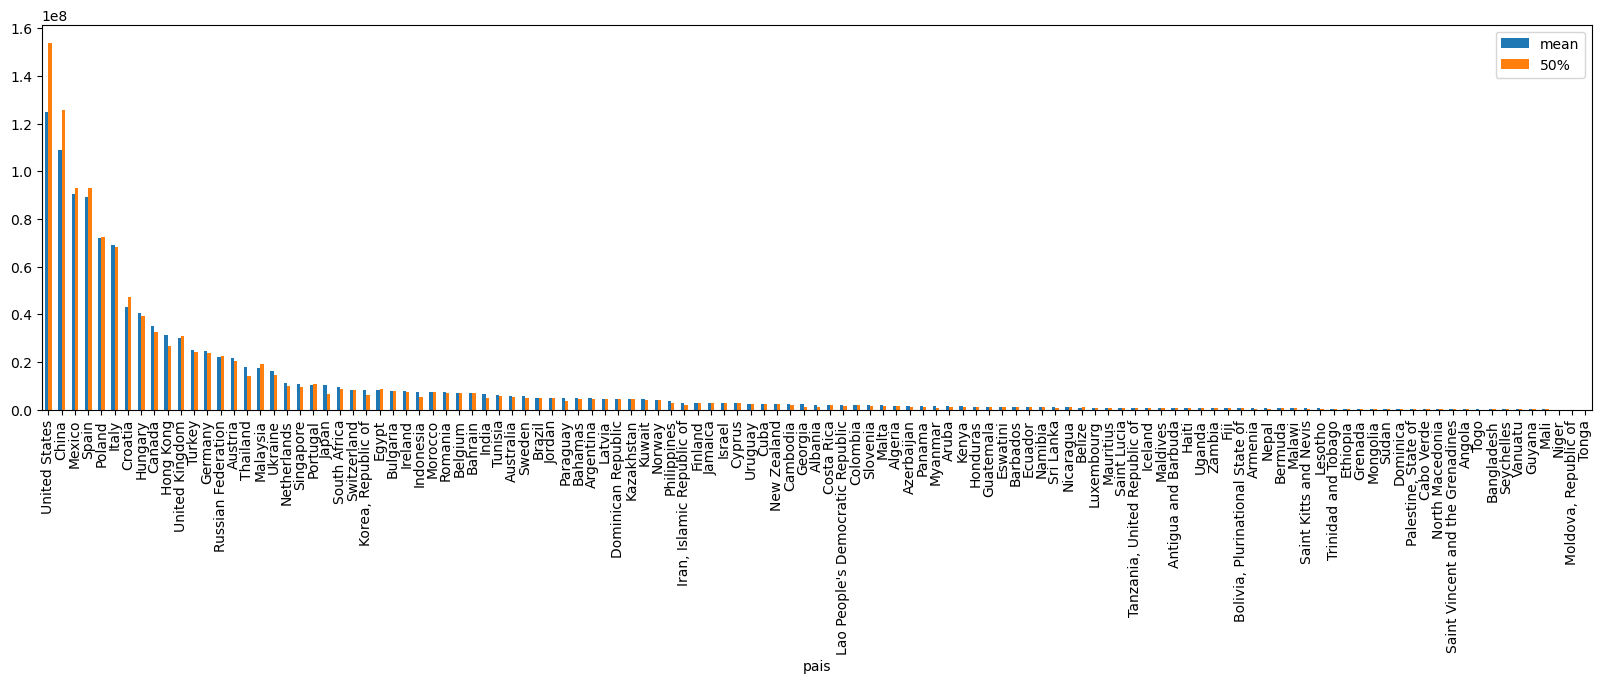

In [9]:
CantidadDeTuristas.T.describe().T.sort_values(by="mean",ascending=False).plot(kind="bar",y=["mean","50%"],figsize=(20,5))

<AxesSubplot:xlabel='pais'>

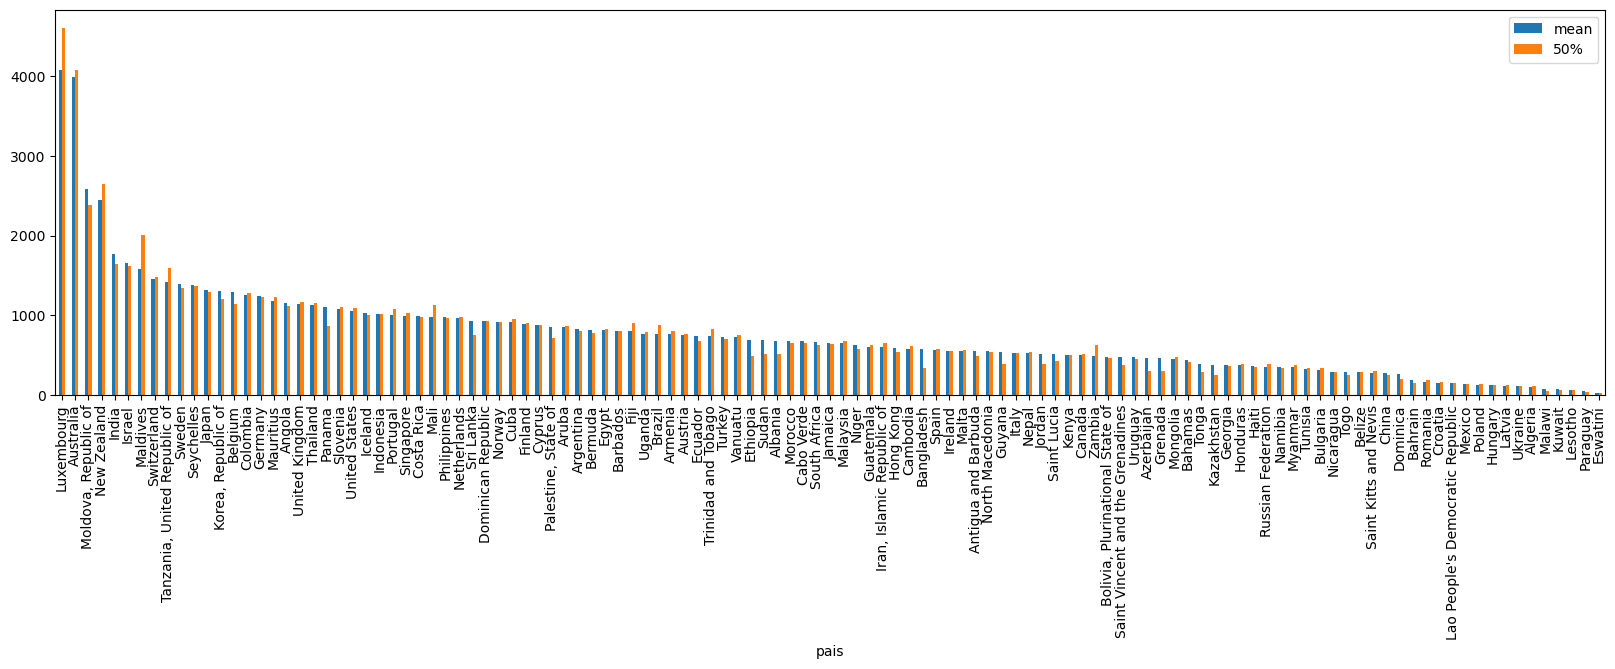

In [10]:
IngresosPorTurista.T.describe().T.sort_values(by="mean",ascending=False).plot(kind="bar",y=["mean","50%"],figsize=(20,5))

<AxesSubplot:ylabel='Frequency'>

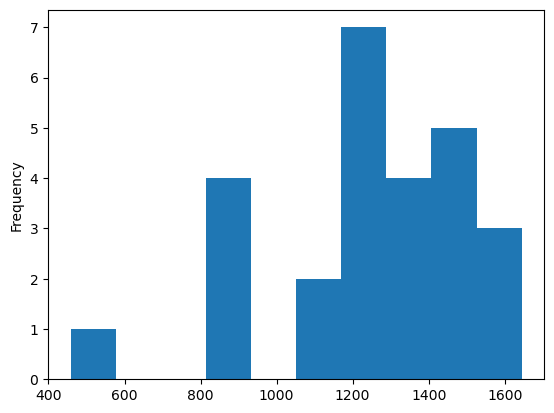

In [11]:
IngresosPorTurista.loc["Colombia"].plot(kind="hist",bins=10)

<AxesSubplot:>

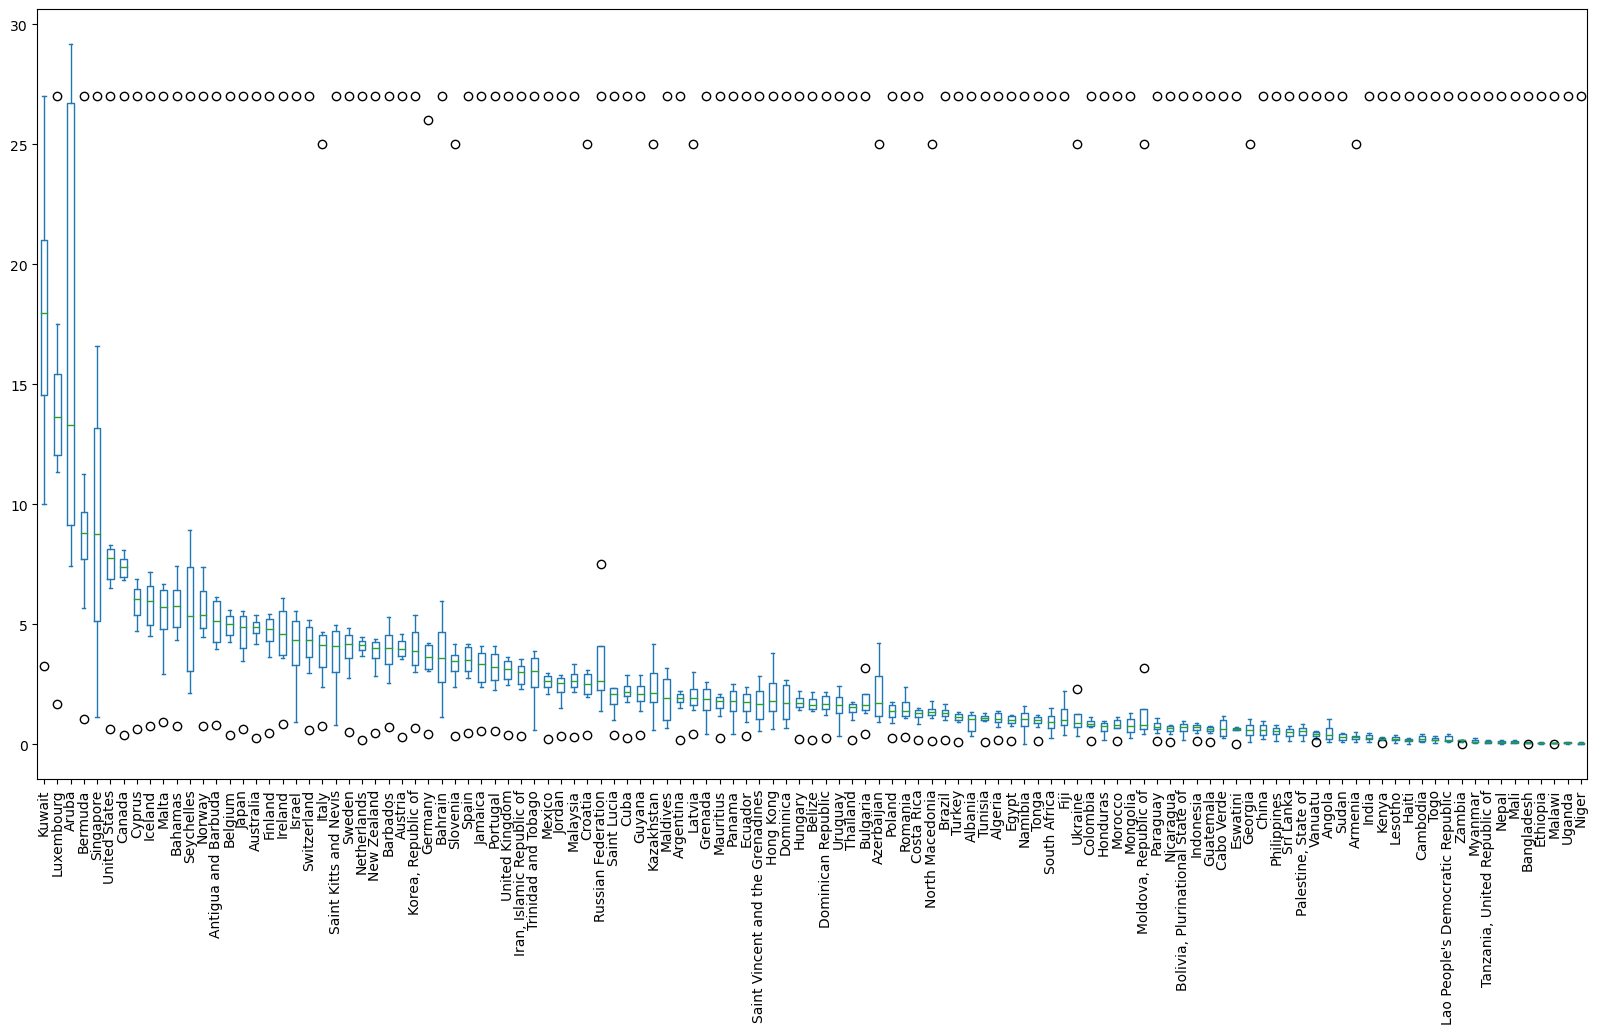

In [12]:
EmisionesCo2PorPersonaEnToneladas.T.describe().T.sort_values(by="50%",ascending=False).T.plot(kind="box",figsize=(20,10), rot=90)

# IndicesRevisar = EmisionesCo2PorPersonaEnToneladas.T.describe().T.sort_values(by="50%",ascending=False).index.values
# EmisionesCo2PorPersonaEnToneladas.loc[IndicesRevisar].T.plot(kind="box",figsize=(20,10), rot=90)
# plt.grid()

<AxesSubplot:>

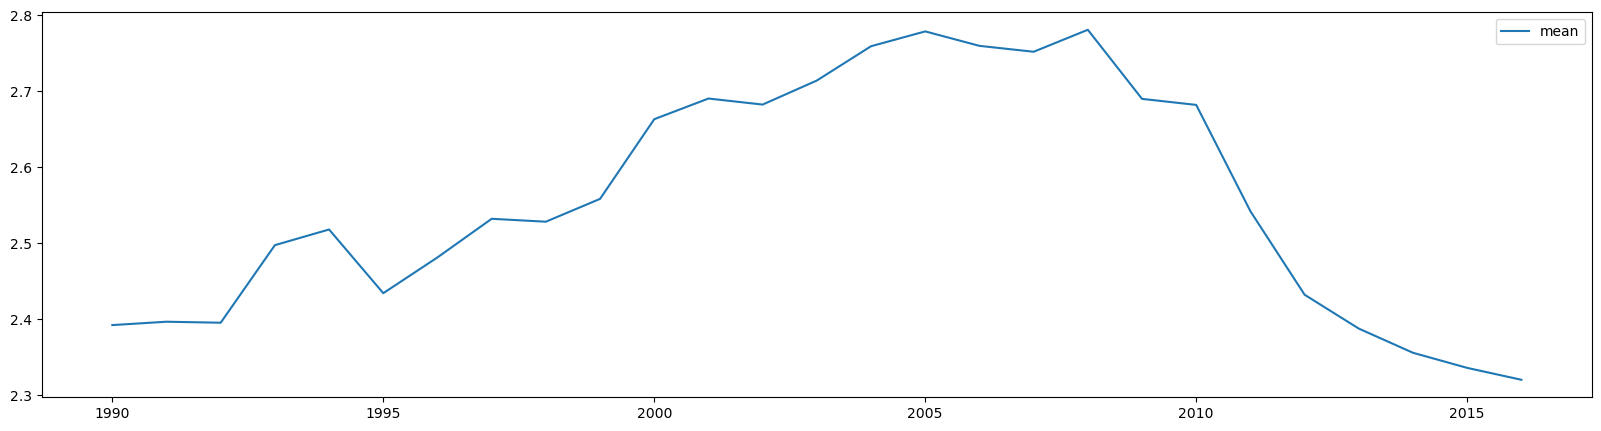

In [13]:
EmisionesCo2PorPersonaEnToneladas.describe().T.plot(kind="line",y="mean",figsize=(20,5))